# <font color=red> Neural Networks </font>

In [4]:
import pandas as pd 
import numpy as np 
from stephentools import get_file
from stephentools import data_d3
from stephentools import analyse_feature_importance
from stephentools import visualize_decision_tree
from sklearn.metrics import r2_score

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve

In [5]:
df = get_file()
df,X,y,X_train, X_test, y_train, y_test=data_d3()
rs=42

## Build a Neural Network model using the default setting. Answer the following: 

### a. Explain the parameters in the model: Network architecture, iterations, activation functions...

In [6]:
model_1 = MLPClassifier(random_state=rs)
model_1.fit(X_train, y_train)

print("Train accuracy:", model_1.score(X_train, y_train))
print("Test accuracy:", model_1.score(X_test, y_test))

y_pred = model_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_1)

Train accuracy: 0.8561190738699008
Test accuracy: 0.7970330411328388
              precision    recall  f1-score   support

       False       0.85      0.82      0.84       940
        True       0.71      0.75      0.73       543

    accuracy                           0.80      1483
   macro avg       0.78      0.79      0.78      1483
weighted avg       0.80      0.80      0.80      1483

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [7]:
y_pred

array([ True,  True, False, ..., False, False,  True])

# Fine Tune Model

In [8]:
print(X_train.shape)

(3628, 166)


## <font color='red'>Model 1<font/>

In [20]:
params = {'hidden_layer_sizes': [(x,) for x in range(100, 200, 20)], 'activation':['tanh']}

cv_1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv_1.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=42, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['tanh'],
                    

In [21]:
result_set = cv_1.cv_results_


In [22]:
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_1.best_params_)

Train accuracy: 0.9137265711135611
Test accuracy: 0.7997302764666218
              precision    recall  f1-score   support

       False       0.82      0.88      0.85       940
        True       0.76      0.67      0.71       543

    accuracy                           0.80      1483
   macro avg       0.79      0.77      0.78      1483
weighted avg       0.80      0.80      0.80      1483

{'activation': 'tanh', 'hidden_layer_sizes': (180,)}


Total number of models:  5


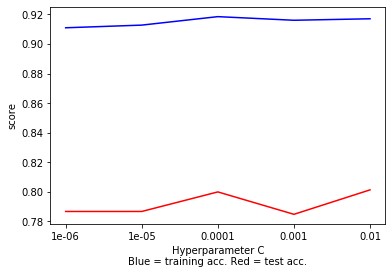

In [23]:
import matplotlib.pyplot as plt

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

## <font color='red'>Model 2<font/>

In [12]:
# new parameters
params = {'hidden_layer_sizes': [(x,) for x in range(130, 160, 15)]}

cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_2.fit(X_train, y_train)

print("Train accuracy:", cv_2.score(X_train, y_train))
print("Test accuracy:", cv_2.score(X_test, y_test))

y_pred = cv_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_2.best_params_)

Train accuracy: 0.8497794928335171
Test accuracy: 0.7835468644639245
              precision    recall  f1-score   support

       False       0.84      0.81      0.83       940
        True       0.69      0.73      0.71       543

    accuracy                           0.78      1483
   macro avg       0.77      0.77      0.77      1483
weighted avg       0.79      0.78      0.78      1483

{'hidden_layer_sizes': (145,), 'max_iter': 700}


## <font color='red'>Model 3<font/>

In [13]:
#3rd
params = {'hidden_layer_sizes': [(x,) for x in range(145, 180, 20)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_3 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_3.fit(X_train, y_train)

print("Train accuracy:", cv_3.score(X_train, y_train))
print("Test accuracy:", cv_3.score(X_test, y_test))

y_pred = cv_3.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_3.best_params_)

Train accuracy: 0.8583241455347299
Test accuracy: 0.7909642616318274
              precision    recall  f1-score   support

       False       0.83      0.84      0.84       940
        True       0.72      0.70      0.71       543

    accuracy                           0.79      1483
   macro avg       0.78      0.77      0.77      1483
weighted avg       0.79      0.79      0.79      1483

{'alpha': 0.001, 'hidden_layer_sizes': (145,)}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## <font color='red'>Model 4<font/>

## <font color='red'>Model 5<font/>

In [ ]:
model_5 = MLPClassifier(hidden_layer_sizes=165, max_iter=1000, solver='lbfgs', random_state=42, activation='tanh')
model_5.fit(X_train, y_train)

print("Train accuracy:", model_5.score(X_train, y_train))
print("Test accuracy:", model_5.score(X_test, y_test))

y_pred = model_5.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_5)

In [ ]:
model_2 = MLPClassifier(hidden_layer_sizes=145, max_iter=700, solver='adam', random_state=42, activation='tanh')
model_2.fit(X_train, y_train)

print("Train accuracy:", model_2.score(X_train, y_train))
print("Test accuracy:", model_2.score(X_test, y_test))

y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_2)

# Select with Decision Tree

In [25]:
import pickle
with open('DTT.pickle', 'rb') as f:
    dt_best,roc_index_dt_best, fpr_dt_best, tpr_dt_best = pickle.load(f)

print(dt_best)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=17,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=19, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [26]:
analyse_feature_importance(dt_best, X.columns)

covid19_symptoms : 0.3413410241684238
income_med : 0.18583591701192714
worried : 0.10597455395847406
working_travel critical : 0.058456086094415056
health_worker : 0.029439756971372532
house_count : 0.02846692453189881
insurance : 0.023375679022204356
weight : 0.022865605806404263
risk_mortality : 0.022056023109254124
race_white : 0.021000208218148336
contacts_count : 0.016268617887987565
covid19_contact : 0.016206941039674228
age_70_80 : 0.015852509441646016
height : 0.015429613628938533
age_60_70 : 0.010948533352158472
immigrant : 0.010781599055408436
country_BR : 0.010712895934315132
age_20_30 : 0.009095618572086035
country_US : 0.008013776318196587
age_40_50 : 0.007704844036732804


In [27]:
from sklearn.feature_selection import SelectFromModel

selectmodel = SelectFromModel(dt_best, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

(3628, 21)


In [33]:
params = {'hidden_layer_sizes': [(x,) for x in range(145, 180, 20)], 'alpha': [0.05]}

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model.best_params_)

Train accuracy: 0.8012679162072768
Test accuracy: 0.7828725556304788
              precision    recall  f1-score   support

       False       0.78      0.91      0.84       940
        True       0.79      0.56      0.65       543

    accuracy                           0.78      1483
   macro avg       0.78      0.73      0.75      1483
weighted avg       0.78      0.78      0.77      1483

{'alpha': 0.05, 'hidden_layer_sizes': (145,)}


In [40]:
model_6 = MLPClassifier(random_state=42, max_iter=250)
model_6.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=250, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [41]:
print("Train accuracy:", model_6.score(X_train, y_train))
print("Test accuracy:", model_6.score(X_test, y_test))


Train accuracy: 0.8616317530319736
Test accuracy: 0.799055967633176


# ROC 

In [24]:
y_pred_proba_nn_1 = model_1.predict_proba(X_test)
y_pred_proba_nn_2 = model_2.predict_proba(X_test)
y_pred_proba_nn_3 = cv_1.predict_proba(X_test)
y_pred_proba_nn_4 = cv_2.predict_proba(X_test)
y_pred_proba_nn_5 = cv_3.predict_proba(X_test)
y_pred_proba_nn_6 = model_5.predict_proba(X_test)
y_pred_proba_nn_7 = model_8.predict_proba(X_test)
y_pred_proba_nn_8 = model_6.predict_proba(X_test)
y_pred_proba_nn_z = model_z.predict_proba(X_test)
y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(X_test_sel_model)
y_pred_proba_cv_y = model_y.predict_proba(X_test)


roc_index_nn_1 = roc_auc_score(y_test, y_pred_proba_nn_1[:, 1])
roc_index_nn_2 = roc_auc_score(y_test, y_pred_proba_nn_2[:, 1])
roc_index_nn_3 = roc_auc_score(y_test, y_pred_proba_nn_3[:, 1])
roc_index_nn_4 = roc_auc_score(y_test, y_pred_proba_nn_4[:, 1])
roc_index_nn_5 = roc_auc_score(y_test, y_pred_proba_nn_5[:, 1])
roc_index_nn_6 = roc_auc_score(y_test, y_pred_proba_nn_6[:, 1])
roc_index_nn_7 = roc_auc_score(y_test, y_pred_proba_nn_7[:, 1])
roc_index_nn_8 = roc_auc_score(y_test, y_pred_proba_nn_8[:, 1])
roc_index_nn_z = roc_auc_score(y_test, y_pred_proba_nn_z[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])
roc_index_nn_y = roc_auc_score(y_test, y_pred_proba_cv_y[:, 1])

print("ROC index on test for NN_default:", roc_index_nn_1)
print("ROC index on test for NN_model_2:", roc_index_nn_2)
print("ROC index on test for NN_cv_1:", roc_index_nn_3)
print("ROC index on test for NN_cv_2:", roc_index_nn_4)
print("ROC index on test for NN_cv_3:", roc_index_nn_5)
print("ROC index on test for NN_model_5:", roc_index_nn_6)
print("ROC index on test for NN_model_7:", roc_index_nn_7)
print("ROC index on test for NN_model_8:", roc_index_nn_8)
print("ROC index on test for NN_model_z:", roc_index_nn_z)
print("ROC index on test for NN with feature selection (model selection) and gridsearch:", roc_index_cv_sel_model)
print("ROC index on test for NN with feature selection (model selection) and gridsearch two:", roc_index_nn_y)

NameError: name 'model_2' is not defined

In [43]:
fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y_test, y_pred_proba_nn_1[:,1])
fpr_nn_2, tpr_nn_2, thresholds_nn_2 = roc_curve(y_test, y_pred_proba_nn_2[:,1])
fpr_cv_3, tpr_cv_3, thresholds_cv_3 = roc_curve(y_test, y_pred_proba_nn_3[:,1])
fpr_cv_4, tpr_cv_4, thresholds_cv_4 = roc_curve(y_test, y_pred_proba_nn_4[:,1])
fpr_cv_5, tpr_cv_5, thresholds_cv_5 = roc_curve(y_test, y_pred_proba_nn_5[:,1])
fpr_nn_6, tpr_nn_6, thresholds_nn_6 = roc_curve(y_test, y_pred_proba_nn_6[:, 1])
fpr_nn_7, tpr_nn_7, thresholds_nn_7 = roc_curve(y_test, y_pred_proba_nn_7[:, 1])
fpr_nn_z, tpr_nn_z, thresholds_nn_z = roc_curve(y_test, y_pred_proba_nn_z[:, 1])
#fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:, 1])


NameError: name 'y_pred_proba_nn_2' is not defined

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr_nn_1, tpr_nn_1, label='NN_default {:.4f}'.format(roc_index_nn_1), color='red', lw=0.5)
plt.plot(fpr_nn_2, tpr_nn_2, label='NN with relu {:.3f}'.format(roc_index_nn_2), color='green', lw=0.5)
plt.plot(fpr_cv_1, tpr_cv_1, label='NN cv_1 {:.3f}'.format(roc_index_nn_3), color='blue', lw=0.5)
plt.plot(fpr_cv_2, tpr_cv_2, label='NN cv_2 {:.3f}'.format(roc_index_nn_4), color='yellow', lw=0.5)
plt.plot(fpr_cv_3, tpr_cv_3, label='NN cv_3 {:.3f}'.format(roc_index_nn_5), color='cyan', lw=0.5)
plt.plot(fpr_nn_6, tpr_nn_6, label='NN 6 {:.3f}'.format(roc_index_nn_6), color='gray', lw=0.5)
plt.plot(fpr_nn_z, tpr_nn_z, label='NN z {:.3f}'.format(roc_index_nn_z), color='purple', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN with cv_sel_model {:.3f}'.format(roc_index_cv_sel_model), color='black', lw=0.5)
plt.plot(fpr_nn_df2,tpr_nn_df2, label='NN default but converged {:.3f}'.format(roc_index_nn_y), color='pink', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [9]:
import matplotlib.pyplot as plt

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

NameError: name 'result_set' is not defined

In [18]:
# Create your first MLP in Keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# load pima indians dataset
model_1 = Sequential(random_state=rs)

# create model
model_1.add(Dense(167, input_dim=8, activation='relu'))
model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model_1.fit(X_train, y_train)
# evaluate the model

from ann_visualizer.visualize import ann_viz;

ann_viz(model_1, title="My graph")

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

# Draft

In [ ]:
model_8 = MLPClassifier(hidden_layer_sizes=165, max_iter=1000, solver='lbfgs', random_state=42, activation='logistic')
model_8.fit(X_train, y_train)

print("Train accuracy:", model_8.score(X_train, y_train))
print("Test accuracy:", model_8.score(X_test, y_test))

y_pred = model_8.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_8)

In [42]:
model_z = MLPClassifier(hidden_layer_sizes=165, max_iter=1000, solver='adam', random_state=42, activation='tanh',alpha= 0.05)
model_z.fit(X_train, y_train)

print("Train accuracy:", model_z.score(X_train, y_train))
print("Test accuracy:", model_z.score(X_test, y_test))

y_pred = model_z.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_z)

Train accuracy: 0.863561190738699
Test accuracy: 0.7936614969656103
              precision    recall  f1-score   support

       False       0.78      0.94      0.85       940
        True       0.85      0.53      0.65       543

    accuracy                           0.79      1483
   macro avg       0.81      0.74      0.75      1483
weighted avg       0.80      0.79      0.78      1483

MLPClassifier(activation='tanh', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=165, learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


In [34]:
params = {'hidden_layer_sizes': [(10,),(20,)],'activation': ['tanh', 'relu'],
    'solver': ['lbfgs', 'adam'],
    'alpha': [0.0001, 0.05]}

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model.best_params_)

Train accuracy: 0.8007166482910695
Test accuracy: 0.7828725556304788
              precision    recall  f1-score   support

       False       0.79      0.90      0.84       940
        True       0.77      0.59      0.66       543

    accuracy                           0.78      1483
   macro avg       0.78      0.74      0.75      1483
weighted avg       0.78      0.78      0.78      1483

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'solver': 'adam'}


In [35]:
params = {'hidden_layer_sizes': [(x,) for x in range(1,20, 1)],'activation': ['tanh', 'relu'],
    'solver': ['lbfgs', 'adam'],
    'alpha': [0.0001, 0.05]}

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model.best_params_)

Train accuracy: 0.804851157662624
Test accuracy: 0.7929871881321645
              precision    recall  f1-score   support

       False       0.82      0.86      0.84       940
        True       0.73      0.68      0.71       543

    accuracy                           0.79      1483
   macro avg       0.78      0.77      0.77      1483
weighted avg       0.79      0.79      0.79      1483

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (16,), 'solver': 'adam'}


In [37]:
model_y = MLPClassifier(hidden_layer_sizes=16, solver='adam', random_state=42, activation='tanh',alpha= 0.05)
model_y.fit(X_train_sel_model, y_train)

print("Train accuracy:", model_y.score(X_train_sel_model, y_train))
print("Test accuracy:", model_y.score(X_test_sel_model, y_test))

y_pred = model_y.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(model_y)

Train accuracy: 0.804851157662624
Test accuracy: 0.7929871881321645
              precision    recall  f1-score   support

       False       0.82      0.86      0.84       940
        True       0.73      0.68      0.71       543

    accuracy                           0.79      1483
   macro avg       0.78      0.77      0.77      1483
weighted avg       0.79      0.79      0.79      1483

MLPClassifier(activation='tanh', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=16, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


Total number of models:  152


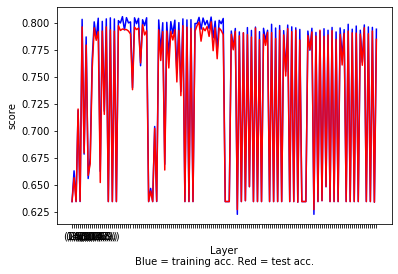

In [39]:
result_set = cv_sel_model.cv_results_
import matplotlib.pyplot as plt
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Layer\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[(x,) for x in range(1,20, 1)])
plt.ylabel('score')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.001))
plt.plot(model_z.loss_curve_)
plt.show()

In [ ]:
def printMLPArchitecture(model):

    print("Number of Layers: ",model.n_layers_ )
    print("The First layer is Input Layer, and the last layer is the output layer")
    for i, w in enumerate(model.coefs_):
        print("{} Layer with hidden size {}".format(i+1, w.shape[0]))
        if (i+1) == len(model.coefs_):
            print("{} Layer with hidden size {}".format(i+2, w.shape[1]))
    
    print("The activation function: ", model.activation)
    print("The alpha function: ",model.alpha)
    print("The solver function: ", model.solver)
            
printMLPArchitecture(model_z)

In [ ]:
printMLPArchitecture(model_y)